This notebook has the code for running the survival analysis, which examines the behavior of each group throughout the observation by scoring group behavior in two minute clips with 5 minute gaps between each clip.

In [1]:
# load packages
import numpy as np
import pandas as pd
import lifelines as ll
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
import matplotlib.pyplot as plt
from lifelines.utils import median_survival_times

ModuleNotFoundError: No module named 'lifelines'

In [3]:
# import data
df = pd.read_csv('data/whole_observation_clean.csv')

In [7]:
# Get data into proper format for lifelines package
surv = df[['observation', 'spp']].drop_duplicates()
surv['duration'] = np.nan
surv['event'] = np.nan

for i in df.observation.unique():
    sub = df[df.observation == i]
    for s in sub.spp.unique():
        sub2 = sub[sub.spp == s]
        if sub2.group_behavior.min() == 0:
            E = 1
            T = sub2[sub2['group_behavior'] == 0.0]['ob_time'].min()
            surv.loc[(surv['observation'] == i) & (surv['spp'] == s), 'event'] = 1
            surv.loc[(surv['observation'] == i) & (surv['spp'] == s), 'duration'] = T
        else:
            E = 0
            T = sub2['ob_time'].max()
            surv.loc[(surv['observation'] == i) & (surv['spp'] == s), 'event'] = 0
            surv.loc[(surv['observation'] == i) & (surv['spp'] == s), 'duration'] = T
surv.head()

,observation,spp,duration,event
0,2,buf,14.0,1.0
3,3,pz,7.0,1.0
6,5,buf,7.0,0.0
8,8,pz,0.0,1.0
11,12,buf,14.0,0.0


<AxesSubplot:xlabel='timeline'>

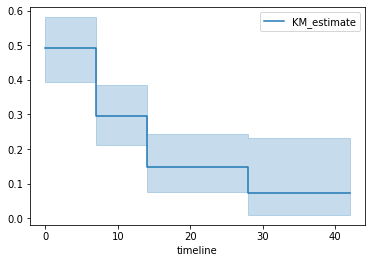

In [10]:
T = surv['duration']
E = surv['event']
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)

kmf.survival_function_
kmf.cumulative_density_
kmf.plot_survival_function()

<AxesSubplot:xlabel='timeline'>

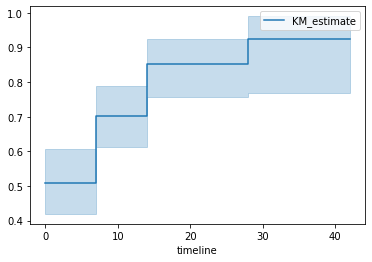

In [11]:
kmf.plot_cumulative_density()